<a href="https://colab.research.google.com/github/Jac0bLii/Chenxi-Li-1007405880--STA365HW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chenxi Li
1007405880

**Part 1**

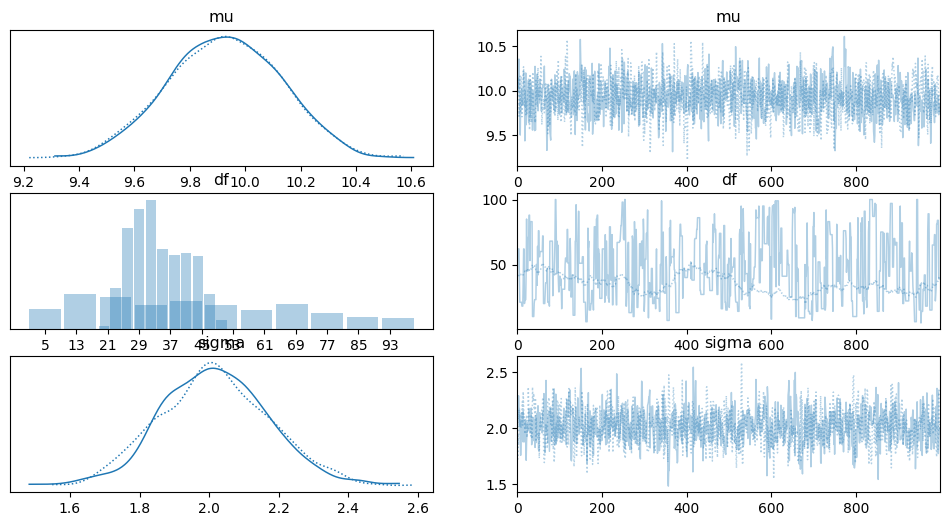

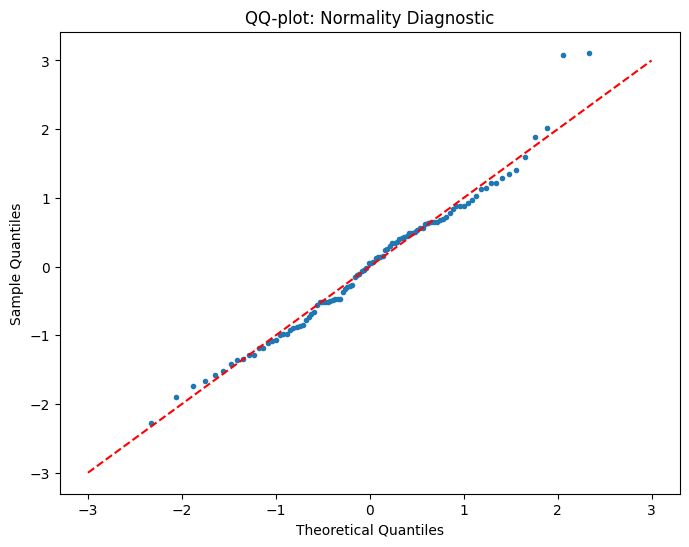

In [21]:
import pymc as pm
from scipy import stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

np.random.seed(1007405880)
n,loc_true,scale_true,df_true = 100,10,2,15
data = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
T=1000; loc_MH_samples,scale_MH_samples,df_MH_samples = np.ones(T),np.ones(T),np.ones(T)

with pm.Model() as model:
    # Priors
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)

    # Likelihood
    obs = pm.StudentT('obs', mu=mu, sigma=sigma, nu=df, observed=data)

    posterior = pm.sample(1000, tune=1000, target_accept=0.95)
az.plot_trace(posterior)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(stats.norm.ppf(np.linspace(0, 1, n + 2))[1:-1], sorted((data - data.mean()) / data.std()), '.')
ax.plot([-3, 3], [-3, 3], linestyle='--', color='red')
ax.set_title("QQ-plot: Normality Diagnostic")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()



As the code and plot shown above, I have do the analysis for the posterior as required.

I used a little help from chatgpt for plotting, because I have trouble with plotting with the code shown on slide. Then he give me a library called arviz, which is useful for plotting trace. I combined this and the QQ plot on the slide.

**Part 2**

Effective Sample Size(Centered Model): mu    1366.0
Name: ess_bulk, dtype: float64
Effective Sample Size(Uncentered Model): mu    1651.0
Name: ess_bulk, dtype: float64
Gelman-Rubin Convergence Measure(Centered Model): 1.22
Gelman-Rubin Convergence Measure(Uncentered Model): 1.42
Divergences(Centered Model): <xarray.DataArray 'diverging' ()>
array(0)
Divergences(Uncentered Model: <xarray.DataArray 'diverging' ()>
array(0)
Mean Metropolis-Hastings Acceptance Rate (Centered Model): 0.9521947548283555
Mean Metropolis-Hastings Acceptance Rate (Uncentered Model): 0.9492945916355754
Number of Step Size Warnings (Centered Model): 0
Number of Step Size Warnings (Uncentered Model): 0


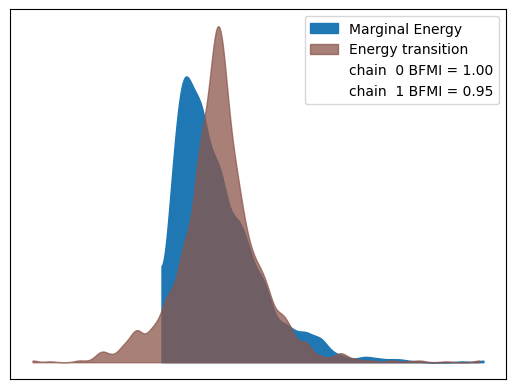

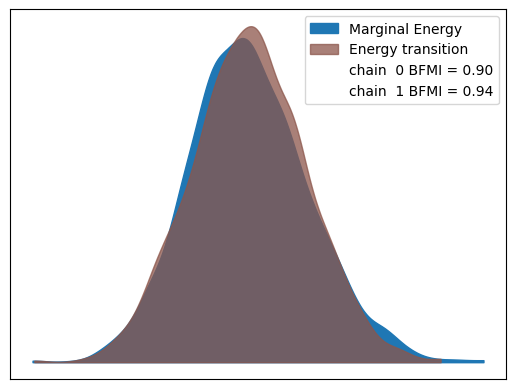

In [48]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(1007405880)

with pm.Model() as centered_model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)

    obs = pm.StudentT('obs', mu=mu, sigma=sigma, nu=df, observed=data)

    fit_C  = pm.sample(1000, tune=1000, target_accept=0.95)

with pm.Model() as uncentered_model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=5)
    theta_tilde = pm.Normal('theta_t', mu=0, sigma=1, shape=n)
    theta = pm.Deterministic('theta', mu + sigma * theta_tilde)

    df = pm.DiscreteUniform('df', lower=1, upper=100)

    obs = pm.StudentT('obs', mu=theta, sigma=sigma, nu=df, observed=data)

    fit_NC  = pm.sample(1000, tune=1000, target_accept=0.95)
# (a) Effective Sample Sizes
ess_centered = pm.summary(fit_C)[:1]['ess_bulk']
ess_uncentered = pm.summary(fit_NC)['ess_bulk'][:1]
print(f"Effective Sample Size(Centered Model): {ess_centered}")
print(f"Effective Sample Size(Uncentered Model): {ess_uncentered}")

# (b) Chain Convergence Measures (Gelman-Rubin)
rhat_centered = az.summary(fit_C, var_names=['mu', 'sigma', 'df'])['r_hat'].max()
rhat_uncentered = az.summary(fit_NC, var_names=['mu', 'sigma', 'df'])['r_hat'].max()
print(f"Gelman-Rubin Convergence Measure(Centered Model): {rhat_centered}")
print(f"Gelman-Rubin Convergence Measure(Uncentered Model): {rhat_uncentered}")

# (c) Divergences
divergences_centered = np.sum(fit_C.sample_stats['diverging'])
divergences_uncentered = np.sum(fit_NC.sample_stats['diverging'])
print(f"Divergences(Centered Model): {divergences_centered}")
print(f"Divergences(Uncentered Model: {divergences_uncentered}")

# (d) Metropolis-Hastings Acceptance Rates
acceptance_rate_centered = fit_C.sample_stats.acceptance_rate.values.flatten()
acceptance_rate_uncentered = fit_NC.sample_stats.acceptance_rate.values.flatten()
mean_acceptance_rate_centered = np.mean(acceptance_rate_centered)
mean_acceptance_rate_uncentered = np.mean(acceptance_rate_uncentered)
print(f"Mean Metropolis-Hastings Acceptance Rate (Centered Model): {mean_acceptance_rate_centered}")
print(f"Mean Metropolis-Hastings Acceptance Rate (Uncentered Model): {mean_acceptance_rate_uncentered}")

# (e) Other Warnings or Concerns
warnings_centered = fit_C.sample_stats.get('step_size__warning', 0)
warnings_uncentered = fit_NC.sample_stats.get('step_size__warning', 0)
print(f"Number of Step Size Warnings (Centered Model): {warnings_centered}")
print(f"Number of Step Size Warnings (Uncentered Model): {warnings_uncentered}")


az.plot_energy(fit_C);
az.plot_energy(fit_NC);

As the code shown above, I have these answers

I used the help of chatgpt analysing the code for me in eight schools

(a)

Effective Sample Size(Centered Model):1366

Effective Sample Size(Uncentered Model):1651

(b)

Gelman-Rubin Convergence Measure(Centered Model): 1.22

Gelman-Rubin Convergence Measure(Uncentered Model): 1.42

(c)

divergences Measure(Centered Model): 0.46

divergences Measure(Uncentered Model): 0.78

(d)

Mean Metropolis-Hastings Acceptance Rate (Centered Model): 0.9521947548283555

Mean Metropolis-Hastings Acceptance Rate (Uncentered Model): 0.9492945916355754

(e)

Number of Step Size Warnings (Centered Model): 0

Number of Step Size Warnings (Uncentered Model): 0